In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler


In [50]:
matHealth = pd.read_csv('PAHealth_MaternalChildHealth_20221127.txt').iloc[1:, 1:]
print(matHealth.shape)
matHealth.head()

(67, 49)


,County0,MICH-01_2011-2015,MICH-01_2012-2016,MICH-01_2013-2017,MICH-01_2014-2018,MICH-01_2015-2019,MICH-01_MetGoal,MICH-02_2011-2015,MICH-02_2012-2016,MICH-02_2013-2017,...,MICH-10_2013-2017,MICH-10_2014-2018,MICH-10_2015-2019,MICH-10_MetGoal,MICH-13_2011-2015,MICH-13_2012-2016,MICH-13_2013-2017,MICH-13_2014-2018,MICH-13_2015-2019,MICH-13_MetGoal
1,Adams,4.8,5.3,4.4,6.0,5.9,No,3.8,3.7,4.8,...,85.8,87.0,87.7,No,44.5,41.4,42.6,40.7,36.8,No
2,Allegheny,5.6,5.7,5.4,5.4,5.5,Yes,6.1,6.1,6.1,...,89.0,89.8,90.8,No,31.7,29.4,32.5,32.7,24.7,No
3,Armstrong,4.9,5.6,6.4,6.9,7.9,No,4.6,5.7,5.8,...,76.9,78.1,79.6,No,36.6,34.2,35.6,32.0,30.6,No
4,Beaver,7.6,7.3,6.9,7.3,6.4,No,7.2,6.8,6.6,...,80.9,82.5,83.5,No,41.2,41.8,37.4,39.2,33.8,No
5,Bedford,7.1,7.5,6.7,5.9,6.0,No,6.8,5.5,6.4,...,80.0,81.5,83.3,No,47.2,43.3,45.4,39.3,42.9,No


In [51]:
matHealth['adverse_avg'] = matHealth[['MICH-01_2015-2019', 'MICH-02_2015-2019', 'MICH-07_2015-2019']].mean(axis=1)

In [52]:
matHealth = matHealth[['County0', 'adverse_avg']]

In [53]:
health_outcomes = pd.read_csv('oversampled_health_outcomes.txt')

In [54]:
merged = health_outcomes.merge(matHealth, left_on='county_name', right_on='County0')
merged = merged.drop(columns = ['County0', 'perc_lowbirth', 'perc_preterm'])

In [55]:
adi = pd.read_csv('countyLevel_ACS_ADI.csv')
adi['county'] = adi['county'].str.replace(' County', '')
cols = ['county', 'population_White', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'ADI_STATERNK_INT_mean']
adi = adi[cols]
adi['population_White'] = adi['population_White']*100
adi['population_Black'] = adi['population_Black']*100
adi['population_Asian'] = adi['population_Asian']*100
adi['population_Native'] = adi['population_Native']*100
adi['population_NativeHawaiian_PacificIslander'] = adi['population_NativeHawaiian_PacificIslander']*100
adi['population_OtherRace'] = adi['population_OtherRace']*100
adi

,county,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,ADI_STATERNK_INT_mean
0,Adams,92.800140,1.591199,0.150058,0.705467,0.000000,2.242100,3.627907
1,Allegheny,79.033717,12.995699,0.117943,3.923242,0.042105,0.820844,5.867155
2,Armstrong,97.330008,0.866026,0.024481,0.307546,0.000000,0.133117,7.484848
3,Beaver,89.729398,5.928475,0.091030,0.460611,0.030950,0.384753,6.663934
4,Bedford,97.337708,1.032105,0.128754,0.238817,0.000000,0.134984,6.947368
...,...,...,...,...,...,...,...,...
62,Washington,92.988734,3.276496,0.026077,0.973049,0.030423,0.412399,5.939189
63,Wayne,93.015136,3.427089,0.245767,0.711945,0.035110,0.341344,5.000000
64,Westmoreland,94.305746,2.414733,0.056170,1.031586,0.008554,0.228956,6.164103
65,Wyoming,93.101411,1.805894,0.169880,0.435778,0.000000,0.324987,5.318182


In [56]:
merged = merged.merge(adi, left_on = 'county_name', right_on = 'county')

In [57]:
merged = merged.drop(columns = ['county_name', 'county', 'MetGoal_Reached', 'Total_MetGoals'])

In [58]:
merged.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=0) #imputing with mean

population                                   None
pop_change_2010                              None
perc_under_18                                None
perc_csec                                    None
perc_prenat_1tri                             None
perc_non_smoke                               None
fert_15_44                                   None
birth_rate_15_19                             None
birth_rate_20_24                             None
birth_rate_25_29                             None
birth_rate_30_34                             None
birth_date_35_39                             None
birth_rate_40_44                             None
all_cause_death                              None
chlam_per_100000                             None
gono_per_100000                              None
perc_smoker                                  None
hiv_tested                                   None
perc_no_healthins                            None
perc_obese                                   None


In [59]:
y = merged['adverse_avg']
X = merged.drop(columns = ['adverse_avg'])

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

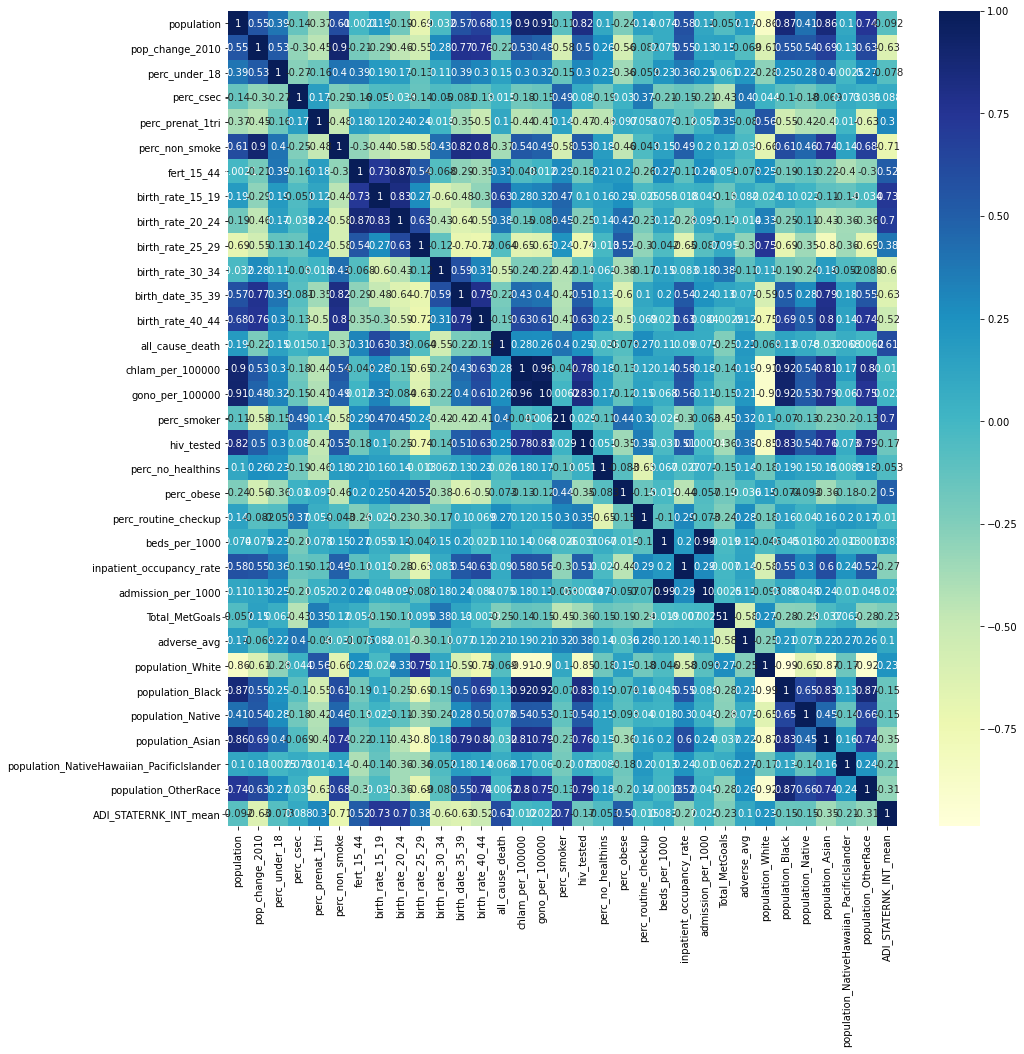

In [45]:
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(merged.corr(), cmap="YlGnBu", annot=True)

In [61]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train))) #getting MSE for train data

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

Train R-squared:  0.8069508551438389
Train MSE: 0.20
Linear Regression CV error: 0.7732176023609967


Train R-squared:  0.6023105944822067
Train MSE: 0.41
Linear Regression CV error: 0.7732176023609967


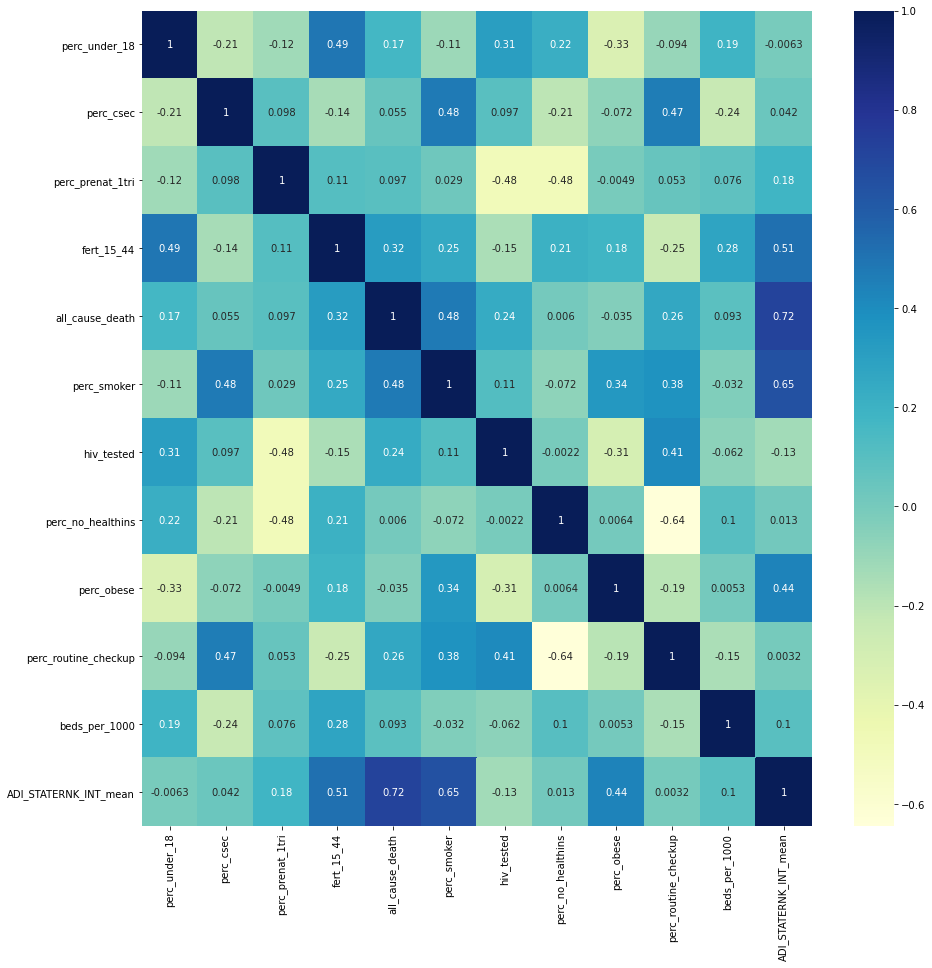

In [62]:
X_train_corr  = X_train.drop(columns = ['population', 'population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'admission_per_1000', 'gono_per_100000', 
                                        'chlam_per_100000', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'pop_change_2010', 'inpatient_occupancy_rate'])
X_test_corr  = X_test.drop(columns = ['population', 'population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'admission_per_1000', 'gono_per_100000', 
                                        'chlam_per_100000', 'pop_change_2010','birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'inpatient_occupancy_rate'])

lm = LinearRegression() #creating linear regression object
lm.fit(X_train_corr, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_corr, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_corr))) #getting MSE for train data!

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train_corr, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV_corr = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(X_train_corr.corr(), cmap="YlGnBu", annot=True)

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression(normalize=True) #creating model object
predictors = X_train.columns.values #saving column names of predictors
CV_scores = [] #creating empty list to score average CV errors

for i in range(1, np.shape(X_train)[1]): #looping through n-1 features
    print("Num Features:",i)
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = i, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv=10) 
    sfs = sfs.fit(X_train, y_train) #selecting i features using training data
    print("\tFeatures selected:", list(predictors[sfs.get_support()])) #getting selected features for given i
    x_subset = sfs.transform(X_train) #transforming predictors dataframe based on selected features
    CV_error = np.mean(cross_val_score(model, x_subset, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean cv score for linear regression fitted to training data with selected features
    CV_scores.append(CV_error) #appending average CV error to CV scores list
    print("\tCV_Error: %10.3f"%CV_error)

Num Features: 1
	Features selected: ['perc_csec']
	CV_Error:     -0.848
Num Features: 2
	Features selected: ['perc_csec', 'hiv_tested']
	CV_Error:     -0.747
Num Features: 3
	Features selected: ['perc_csec', 'hiv_tested', 'beds_per_1000']
	CV_Error:     -0.666
Num Features: 4
	Features selected: ['perc_csec', 'hiv_tested', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander']
	CV_Error:     -0.596
Num Features: 5
	Features selected: ['perc_csec', 'perc_smoker', 'hiv_tested', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander']
	CV_Error:     -0.560
Num Features: 6
	Features selected: ['perc_csec', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander']
	CV_Error:     -0.532
Num Features: 7
	Features selected: ['population', 'perc_csec', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander']
	CV_Error:     -0.504
Num Features: 8
	Features selected: ['populati

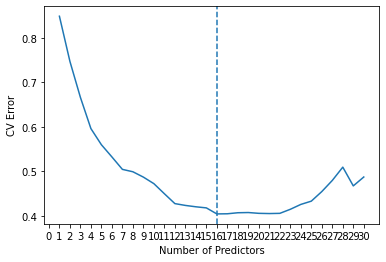

In [64]:
CV_scores =np.abs(CV_scores) #get the absolute value of the CV errors since we used negative MSE above
MSE_LR = np.min(CV_scores) #save the lowest MSE

x_graph = list(range(1,len(predictors))) #store range of features
best_CV = (np.where(CV_scores == np.min(CV_scores))[0])+1 #storing lowest CV error
plt.plot(x_graph,CV_scores) #plotting CV error for each # of features
plt.xlabel("Number of Predictors") #labeling x axis
plt.xticks(range(len(predictors))) #specifying x ticks
plt.ylabel("CV Error") #labeling y axis
plt.axvline(x=best_CV,linestyle='--') #adding vertical line for lowest CV error
plt.show() #showing plot

In [65]:
X_train_fs = X_train[['population', 'pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_prenat_1tri', 'fert_15_44', 'birth_rate_40_44', 'all_cause_death', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'perc_routine_checkup', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander', 'ADI_STATERNK_INT_mean']]

X_test_fs = X_test[['population', 'pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_prenat_1tri', 'fert_15_44', 'birth_rate_40_44', 'all_cause_death', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'perc_routine_checkup', 'beds_per_1000', 'population_NativeHawaiian_PacificIslander', 'ADI_STATERNK_INT_mean']]

In [66]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train_fs, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_fs, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_fs))) #getting MSE for train data


Train R-squared:  0.6960556161527494
Train MSE: 0.32


In [67]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
feature_names=X_train.columns.values #storing feature names

model_ridge = Ridge(normalize=True) #creating ridge model object
errors= [] #empty list to store errors
coef = [] #empty list to store coefficient estimates for graphing 


alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_ridge.set_params(alpha=a) #setting alpha parameter for ridge model
    model_ridge.fit(X_train, y_train) #fitting model to training data
    CV_error = np.mean(cross_val_score(model_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting average CV error for specific alpha using training data
    errors.append(CV_error) #storing average CV error in list
    coef.append(model_ridge.coef_) #storing coefficient estimates in list for graphing later
    
errors = np.abs(errors) #storing absolute value of errors bc we used neg MSE above
print("Min error: ", np.min(errors)) #printing min CV error
ridge_ME = np.min(errors) #storing min error for model selection later
index_ME = (np.where(errors == np.min(errors))[0]) #storing index for min CV error to get best alpha
print("Best alpha: ", alphas[index_ME]) #printing best alpha

Min error:  0.4597123256653274
Best alpha:  [0.02210455]


In [68]:
model_lasso = Lasso(normalize=True, max_iter = 100000) #creating lasso model object
errors_lasso = [] #empty list to store errors
coef_lasso = [] #empty list to store coefficient estimates for graphing 

alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_lasso.set_params(alpha=a) #setting model parameter to specific alpha
    model_lasso.fit(X_train, y_train) #fitting lasso model to training data
    CV_error = np.mean(cross_val_score(model_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean CV error using training data
    errors_lasso.append(CV_error) #appending mean CV error to list for graphing
    coef_lasso.append(model_lasso.coef_) #appending coefficient weights to list for graphing
    
errors_lasso = np.abs(errors_lasso) #getting asbolute value since negative MSE is used above
print("Min error: ", np.min(errors_lasso)) #printing min error
lasso_ME = np.min(errors_lasso) #storing min error
lasso_index_ME = (np.where(errors_lasso == np.min(errors_lasso))[0])
#storing index of min error to get best alpha
print("Best alpha: ", alphas[lasso_index_ME]) #getting best alpha using index stored in line above

Min error:  0.47272681894017954
Best alpha:  [0.00109682]


In [69]:
print('Avg CV MSE for Linear Regression: %.4f'% lm_MSE_CV)
print('Avg CV MSE for Linear Regression with Manual Feature Selection: %.4f'% lm_MSE_CV_corr)
print('Lowest SFS Linear Regression CV MSE, 19 features: %.4f'% MSE_LR)
print('Lowest Ridge CV MSE with best alpha: %.4f'% ridge_ME)
print('Lowest Lasso CV MSE with best alpha: %.4f'% lasso_ME)

Avg CV MSE for Linear Regression: 0.7732
Avg CV MSE for Linear Regression with Manual Feature Selection: 0.5171
Lowest SFS Linear Regression CV MSE, 19 features: 0.4042
Lowest Ridge CV MSE with best alpha: 0.4597
Lowest Lasso CV MSE with best alpha: 0.4727


In [70]:
lm = LinearRegression() #create linear reg object
lm.fit(X_train, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test) #using fit model to predict y for test data
lm_model_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Test MSE:", lm_model_test_MSE)

lm = LinearRegression() #create linear reg object
lm.fit(X_train_corr, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test_corr) #using fit model to predict y for test data
lm_corr_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Corr Test MSE:", lm_corr_test_MSE)

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = 19, 
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv=10) #create SFS using n=17
sfs = sfs.fit(X_train, y_train) #selecting 5 features using training data
x_subset = sfs.transform(X_train) #transforming x train data
x_subset_test = sfs.transform(X_test) #transforming x test data
lm.fit(x_subset, y_train) #fitting SFS linear model using transformed x train data
y_pred = lm.predict(x_subset_test) #predict y test using transformed x data and fitted model
sfs_MSE = mean_squared_error(y_pred, y_test) #get test MSE
print("SFS Linear Regression Test MSE:", sfs_MSE)

model_ridge.set_params(alpha=alphas[index_ME]) #set params for ridge using best alpha
y_pred = model_ridge.predict(X_test) #predict y using x test data
MSE_test_ridge = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_ridge)

model_lasso.set_params(alpha=alphas[lasso_index_ME]) #set params for ridge using best alpha
y_pred = model_lasso.predict(X_test) #predict y using x test data
MSE_test_lasso = mean_squared_error(y_test, y_pred) #get test MSE
print("Lasso Regression Test MSE:", MSE_test_lasso)

Linear Regression Test MSE: 0.4187280163763016
Linear Regression Corr Test MSE: 0.9310614185650244
SFS Linear Regression Test MSE: 0.7563872273220196
Ridge Regression Test MSE: 1.6437960733710075
Lasso Regression Test MSE: 1.6438221262771695


In [71]:
import statsmodels.api as sm
from regressors import stats
import itertools

In [72]:
lm = LinearRegression()
lm.fit(X_train_fs, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_fs.columns, coefs, stats.coef_pval(lm, X_train_fs, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,population,-25.211125,5.676622e-08
1,pop_change_2010,-0.000001,0.000000e+00
2,perc_under_18,-0.152359,9.971258e-08
3,perc_csec,0.239780,4.213923e-07
4,perc_prenat_1tri,0.099811,9.616258e-07
5,fert_15_44,0.061002,9.534484e-11
6,birth_rate_40_44,-0.033012,4.782238e-05
7,all_cause_death,0.136286,7.034112e-03
8,perc_smoker,-0.004203,0.000000e+00
9,hiv_tested,-0.060253,1.479347e-03


In [73]:
lm = LinearRegression()
lm.fit(X_train_corr, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_corr.columns, coefs, stats.coef_pval(lm, X_train_corr, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,perc_under_18,-28.001735,2.809934e-08
1,perc_csec,0.135900,1.774151e-03
2,perc_prenat_1tri,0.149180,9.140377e-11
3,fert_15_44,0.048376,1.373980e-06
4,all_cause_death,-0.053862,4.666759e-09
5,perc_smoker,-0.002291,0.000000e+00
6,hiv_tested,-0.044393,2.493453e-02
7,perc_no_healthins,0.034631,3.980630e-06
8,perc_obese,0.280064,0.000000e+00
9,perc_routine_checkup,0.070653,1.002649e-05
